![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# 04 | Overfitting & Hyperparameter Tuning with Cross Validation

## Chapter Importance

We have already covered:

1. Regression Models
2. Classification Models
3. Train Test Split for Model Selection

In short, we have computed all possible types of models to predict numerical and categorical variables with Regression and Classification models, respectively.

Although it is not enough with computing one model, we need to compare different models to choose the one whose predictions are close to reality.

Nevertheless, we cannot evaluate the model on the same data we used to `.fit()` (train) the mathematical equation (model). We need to separate the data into train and test sets; the first to train the model, the later to evaluate the model.

No we add an extra layer of complexity because we can improve a model (an algorithm) by configuring its parameters. This chapter is all about **computing different combinations of a single model's hyperparameters** to get the best.

## [ ] Load the [Data](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

- The goal of this dataset is
- To predict if **bank's customers** (rows) `default` next month
- Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df_credit = pd.read_excel(io=url, header=1, index_col=0)
df_credit.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
19324,200000,2,1,2,39,-2,-2,-2,-2,-2,-2,345,355,0,0,907,0,355,0,0,907,0,0,0
29653,210000,1,3,2,48,0,0,0,0,-1,-1,85107,83658,73664,38405,38395,5062,33658,30003,1000,38395,5062,13061,0
3039,280000,1,2,1,37,-2,-1,-1,-2,-2,-2,2035,11009,9360,7480,4402,3646,11009,9370,7486,4402,3646,6059,0
5675,100000,2,2,1,41,2,2,2,2,2,0,97031,96919,93277,97576,94742,95578,3500,0,7000,0,3600,4000,1
13256,170000,2,2,2,29,0,0,0,0,0,0,161581,163500,166003,167287,165510,168507,6000,8000,6300,6000,6500,6100,0
17109,260000,2,1,2,27,0,0,0,0,0,0,23820,23873,14856,17022,20032,11144,10000,3000,4000,5000,3000,6000,0
25772,350000,2,1,1,33,0,-1,-1,-1,-1,-1,82964,68532,17926,17966,30741,31088,68940,18018,18058,30897,31244,88461,1
16930,60000,1,2,1,52,0,0,0,0,0,0,58682,56893,58170,56539,29425,28013,3762,3000,2000,1000,1000,1500,0
6041,20000,2,2,2,23,2,2,7,7,7,6,2400,2400,2400,2400,2400,1800,0,0,0,0,0,0,1


## Preprocess the Data

### Missing Data

In [2]:
df_credit.isna().sum()

LIMIT_BAL                     0
SEX                           0
                             ..
PAY_AMT6                      0
default payment next month    0
Length: 24, dtype: int64

In [3]:
df_credit.isna().sum().sum()

0

### Dummy Variables

In [4]:
df_credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## Feature Selection

In [5]:
X = df_credit.iloc[:,:-1]

In [6]:
y = df_credit.iloc[:,-1]

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [9]:
df_credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [10]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
16832,120000,1,3,1,49,0,-1,-1,-1,-1,-1,119440,3844,2290,780,8190,4600,3844,2299,780,8190,4600,1081
4223,30000,1,1,2,38,2,0,0,0,0,0,69707,71904,62630,57406,46231,73262,4000,5000,8000,1460,40000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,70000,2,2,2,25,0,0,0,0,2,2,73939,70488,51152,35122,28633,28039,3000,2000,4500,1200,0,1200
23655,160000,2,2,1,36,-2,-2,-2,-2,-2,-2,-20,-20,3640,2935,1603,14129,0,3660,3135,1650,14200,1500


In [11]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
2309,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22405,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27302,30000,1,2,2,30,0,0,0,0,-1,0,29993,29890,28561,-229,23930,26655,1856,1000,1698,24860,3500,3000
18452,170000,2,2,2,24,0,0,0,0,0,0,64142,54347,55677,59096,50536,15851,3000,3000,5000,10000,5000,6000


In [12]:
y_train

ID
16832    1
4223     0
        ..
15796    1
23655    1
Name: default payment next month, Length: 20100, dtype: int64

In [13]:
y_test

ID
2309     0
22405    0
        ..
27302    0
18452    0
Name: default payment next month, Length: 9900, dtype: int64

## [ ] `DecisionTreeClassifier()` with Default Hyperparameters

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model_dt = DecisionTreeClassifier()

In [16]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Accuracy

#### In `train` data

In [17]:
model_dt.score(X_train, y_train)

0.9995024875621891

#### In `test` data

In [18]:
model_dt.score(X_test, y_test)

0.7264646464646465

### Model Visualization

In [19]:
from sklearn.tree import plot_tree

In [20]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## `DecisionTreeClassifier()` with Custom Hyperparameters

### 1st Configuration

In [21]:
model_dt = DecisionTreeClassifier(max_depth=4)

In [22]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### Accuracy

##### In `train` data

In [23]:
model_dt.score(X_train, y_train)

0.8232338308457712

##### In `test` data

In [24]:
model_dt.score(X_test, y_test)

0.8205050505050505

#### Model Visualization

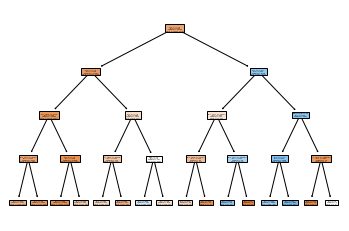

In [25]:
plot_tree(decision_tree=model_dt, feature_names=X.columns, filled=True);

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4756451%2F5724f9841b58cbd7838a851ac6df659b%2Frpqa6.jpg?generation=1608831884903054&alt=media)

### [ ] 2nd Configuration

In [26]:
model_dt = DecisionTreeClassifier(max_depth=2)

In [27]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

#### Accuracy

##### In `train` data

In [28]:
model_dt.score(X_train, y_train)

0.819452736318408

##### In `test` data

In [29]:
model_dt.score(X_test, y_test)

0.8215151515151515

#### Model Visualization

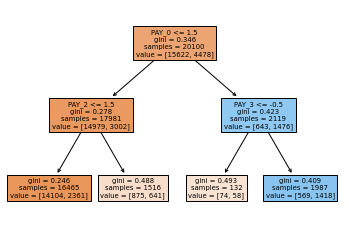

In [30]:
plot_tree(decision_tree=model_dt, feature_names=X.columns, filled=True);

### 3rd Configuration

In [31]:
model_dt = DecisionTreeClassifier(max_depth=4, criterion='entropy')

In [32]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Accuracy

##### In `train` data

In [33]:
model_dt.score(X_train, y_train)

0.8235820895522388

##### In `test` data

In [34]:
model_dt.score(X_test, y_test)

0.8203030303030303

#### Model Visualization

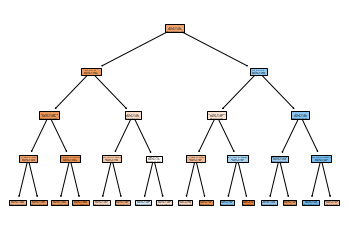

In [35]:
plot_tree(decision_tree=model_dt, feature_names=X.columns, filled=True);

### 4th Configuration

In [36]:
model_dt = DecisionTreeClassifier(min_samples_leaf=200)

In [37]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=200)

#### Accuracy

##### In `train` data

In [38]:
model_dt.score(X_train, y_train)

0.8211940298507463

##### In `test` data

In [39]:
model_dt.score(X_test, y_test)

0.8186868686868687

#### Model Visualization

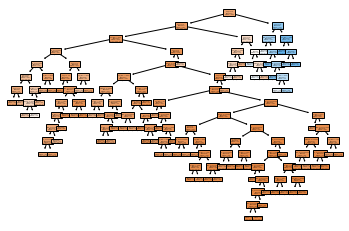

In [40]:
plot_tree(decision_tree=model_dt, feature_names=X.columns, filled=True);

### 5th Configuration

In [41]:
model_dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=150, criterion='entropy')

In [42]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=150)

#### Accuracy

##### In `train` data

In [43]:
model_dt.score(X_train, y_train)

0.821592039800995

##### In `test` data

In [44]:
model_dt.score(X_test, y_test)

0.8176767676767677

#### Model Visualization

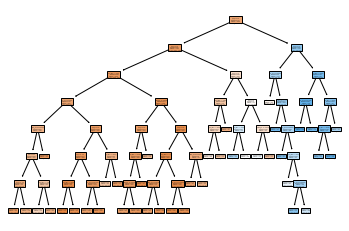

In [45]:
plot_tree(decision_tree=model_dt, feature_names=X.columns, filled=True);

## [ ] `GridSearchCV()` to find Best Hyperparameters

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
model_dt = DecisionTreeClassifier()

In [48]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [49]:
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600],
    'criterion': ['gini', 'entropy']
}

In [50]:
6*7*2

84

In [51]:
6*7*2*5

420

In [52]:
cv_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid, verbose=2)

In [53]:
cv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.2s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.2s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.2s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.2s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_s

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=2)

In [54]:
cv_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100)

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

## [ ] Other Models

Now let's try to find the best hyperparameter configuration of other models, which don't have the same hyperparameters than the Decision Tree because their algorithm and mathematical equation are different.

### Support Vector Machines `SVC()`

In [55]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [56]:
from sklearn.svm import SVC

In [57]:
model_sv = SVC()

In [58]:
model_sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [59]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [60]:
cv_sv = GridSearchCV(estimator=model_sv, param_grid=param_grid, verbose=2)

In [61]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
16832,120000,1,3,1,49,0,-1,-1,-1,-1,-1,119440,3844,2290,780,8190,4600,3844,2299,780,8190,4600,1081
4223,30000,1,1,2,38,2,0,0,0,0,0,69707,71904,62630,57406,46231,73262,4000,5000,8000,1460,40000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,70000,2,2,2,25,0,0,0,0,2,2,73939,70488,51152,35122,28633,28039,3000,2000,4500,1200,0,1200
23655,160000,2,2,1,36,-2,-2,-2,-2,-2,-2,-20,-20,3640,2935,1603,14129,0,3660,3135,1650,14200,1500


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
scaler.fit(X=X_train)

MinMaxScaler()

In [73]:
X_train_scaled = pd.DataFrame(scaler.transform(X=X_train), columns=X_train.columns, index=X_train.index)

In [74]:
X_test_scaled = pd.DataFrame(scaler.transform(X=X_test), columns=X_test.columns, index=X_test.index)

In [76]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
2309,30000,1,2,2,25,0,0,0,0,0,0,8864,10062,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22405,150000,2,1,2,26,0,0,0,0,0,0,136736,125651,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27302,30000,1,2,2,30,0,0,0,0,-1,0,29993,29890,28561,-229,23930,26655,1856,1000,1698,24860,3500,3000
18452,170000,2,2,2,24,0,0,0,0,0,0,64142,54347,55677,59096,50536,15851,3000,3000,5000,10000,5000,6000


In [75]:
X_test_scaled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
2309,0.020202,0.0,0.333333,0.666667,0.074074,0.2,0.2,0.2,0.2,0.2,0.2,0.154363,0.075770,0.042355,0.171988,0.094248,0.191233,0.001717,0.001187,0.001674,0.002415,0.003517,0.003794
22405,0.141414,1.0,0.166667,0.666667,0.092593,0.2,0.2,0.2,0.2,0.2,0.2,0.267515,0.185467,0.103263,0.255826,0.157733,0.244564,0.005135,0.002514,0.003528,0.004262,0.006257,0.005063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27302,0.020202,0.0,0.333333,0.666667,0.166667,0.2,0.2,0.2,0.2,0.1,0.2,0.173060,0.094587,0.052195,0.159922,0.104376,0.201335,0.002125,0.000594,0.001895,0.040032,0.008206,0.005691
18452,0.161616,1.0,0.333333,0.666667,0.055556,0.2,0.2,0.2,0.2,0.2,0.2,0.203277,0.117797,0.067909,0.215805,0.130758,0.192107,0.003434,0.001781,0.005580,0.016103,0.011723,0.011382


In [77]:
cv_sv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   3.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   4.2s
[CV] END .................................C=1, kernel=linear; total time=   3.1s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [78]:
cv_sv.best_params_

{'C': 10, 'kernel': 'rbf'}

### K Nearest Neighbors `KNeighborsClassifier()`

In [79]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
model_kn = KNeighborsClassifier()

In [82]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [83]:
param_grid = {
    'leaf_size': [10, 20, 30, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [3, 5, 10, 20]
}

In [87]:
cv_kn = GridSearchCV(estimator=model_kn, param_grid=param_grid, verbose=2)

In [88]:
cv_kn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.9s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.9s
[CV] END .....leaf_size=10, metric=minkowski, n_neighbors=10; total time=   0.9s
[CV] END .....leaf_size=10, metric=minkowski, n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]},
             verbose=2)

In [90]:
cv_kn.best_params_

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}

## [ ] Best Model with Best Hyperparameters

In [131]:
dic_results = {
    'model': [
        cv_dt.best_estimator_,
        cv_sv.best_estimator_,
        cv_kn.best_estimator_
    ],
    'hyperparameters': [
        cv_dt.best_params_,
        cv_sv.best_params_,
        cv_kn.best_params_
    ],
    'score': [
        cv_dt.score(X_test, y_test),
        cv_sv.score(X_test_scaled, y_test),
        cv_kn.score(X_test_scaled, y_test)
    ]
}

In [134]:
df_res = pd.DataFrame(dic_results)

In [136]:
df_res.style.background_gradient()

,model,hyperparameters,score
0,"DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100)","{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100}",0.818687
1,SVC(C=10),"{'C': 10, 'kernel': 'rbf'}",0.818889
2,"KNeighborsClassifier(leaf_size=10, n_neighbors=20)","{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}",0.807677


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.